In [1]:
import pandas as pd
from datetime import datetime

In [2]:
chunksize = 10 ** 6
num_of_chunks = 0
train = pd.DataFrame()
parse_date = lambda val : datetime.strptime(val, '%y%m%d%H')

for chunk in pd.read_csv(
        '/home/stefan/Documents/projects/data/avazu-ctr-prediction/train',
        parse_dates=['hour'],
        date_parser=parse_date,
        chunksize=chunksize):
    num_of_chunks += 1
    train = pd.concat([train, chunk.sample(frac=0.5, replace=False, random_state=1234)], axis=0)
    print(f'Processing chunk number: {num_of_chunks}')

train.reset_index(inplace=True)
train_len = len(train)
train_len

Processing chunk number: 1
Processing chunk number: 2
Processing chunk number: 3
Processing chunk number: 4
Processing chunk number: 5
Processing chunk number: 6
Processing chunk number: 7
Processing chunk number: 8
Processing chunk number: 9
Processing chunk number: 10
Processing chunk number: 11
Processing chunk number: 12
Processing chunk number: 13
Processing chunk number: 14
Processing chunk number: 15
Processing chunk number: 16
Processing chunk number: 17
Processing chunk number: 18
Processing chunk number: 19
Processing chunk number: 20
Processing chunk number: 21
Processing chunk number: 22
Processing chunk number: 23
Processing chunk number: 24
Processing chunk number: 25
Processing chunk number: 26
Processing chunk number: 27
Processing chunk number: 28
Processing chunk number: 29
Processing chunk number: 30
Processing chunk number: 31
Processing chunk number: 32
Processing chunk number: 33
Processing chunk number: 34
Processing chunk number: 35
Processing chunk number: 36
P

20214484

In [3]:
train['month'] = train['hour'].dt.month
train['dayofweek'] = train['hour'].dt.dayofweek
train['day'] = train['hour'].dt.day
train['hour_time'] = train['hour'].dt.hour
train.head(2)

,index,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,...,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour_time
0,433572,7.582956e+18,1,2014-10-21 02:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,...,50,2201,3,35,-1,43,10,1,21,2
1,254298,9.742865e+17,0,2014-10-21 01:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,9f06e9a1,...,50,2480,3,297,100111,61,10,1,21,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20214484 entries, 0 to 20214483
Data columns (total 29 columns):
 #   Column            Dtype         
---  ------            -----         
 0   index             int64         
 1   id                float64       
 2   click             int64         
 3   hour              datetime64[ns]
 4   C1                int64         
 5   banner_pos        int64         
 6   site_id           object        
 7   site_domain       object        
 8   site_category     object        
 9   app_id            object        
 10  app_domain        object        
 11  app_category      object        
 12  device_id         object        
 13  device_ip         object        
 14  device_model      object        
 15  device_type       int64         
 16  device_conn_type  int64         
 17  C14               int64         
 18  C15               int64         
 19  C16               int64         
 20  C17               int64         
 21  C18   

In [5]:
train.isnull().sum()

index               0
id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour_time           0
dtype: int64

In [6]:
train.describe()

,index,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour_time
count,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,20214484.0,2.021448e+07,2.021448e+07,2.021448e+07
mean,2.021419e+07,9.223368e+18,1.698491e-01,1.004968e+03,2.879966e-01,1.015290e+00,3.314826e-01,1.884226e+04,3.188872e+02,6.009537e+01,2.112627e+03,1.432316e+00,2.270870e+02,5.320581e+04,8.339376e+01,10.0,2.601778e+00,2.546971e+01,1.127634e+01
std,1.167084e+07,5.325717e+18,3.755001e-01,1.094567e+00,5.063878e-01,5.275321e-01,8.549997e-01,4.958358e+03,2.131245e+01,4.728170e+01,6.093306e+02,1.326297e+00,3.509372e+02,4.995752e+04,7.029398e+01,0.0,1.728107e+00,2.963312e+00,5.953236e+00
min,0.000000e+00,5.211594e+11,0.000000e+00,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00,10.0,0.000000e+00,2.100000e+01,0.000000e+00
25%,1.010699e+07,4.611100e+18,0.000000e+00,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01,10.0,1.000000e+00,2.300000e+01,6.000000e+00
50%,2.021422e+07,9.224303e+18,0.000000e+00,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,1.000480e+05,6.100000e+01,10.0,2.000000e+00,2.600000e+01,1.100000e+01
75%,3.032112e+07,1.383729e+19,0.000000e+00,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,1.000930e+05,1.010000e+02,10.0,4.000000e+00,2.800000e+01,1.600000e+01
max,4.042897e+07,1.844674e+19,1.000000e+00,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.405200e+04,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.959000e+03,1.002480e+05,2.550000e+02,10.0,6.000000e+00,3.000000e+01,2.300000e+01


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
numerical = []
categorical = []

for col in train.columns:
    if train[col].dtype == "object":
        categorical.append(col)
    else:
        numerical.append(col)
print("numerical columns = ", numerical)
print("\ncategorical columns = ", categorical)

numerical columns =  ['index', 'id', 'click', 'hour', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour_time']

categorical columns =  ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']


<Axes: xlabel='click', ylabel='count'>

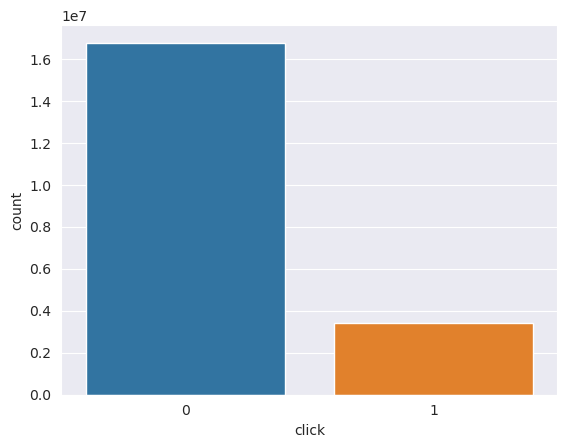

In [9]:
train.click.value_counts(normalize=True)
plt.figure()
sns.countplot(x='click', data=train)


In [ ]:
print(f'Unique counts of site_id: {len(train.site_id.unique())}')
print(train.site_id.value_counts(normalize=True))

In [ ]:
print(f'Unique counts of site_id: {len(train.site_domain.unique())}')
print(train.site_domain.value_counts(normalize=True))

In [ ]:
print(f'Unique counts of site_id: {len(train.site_category.unique())}')
print(train.site_category.value_counts(normalize=True))

In [ ]:
print(f'Unique counts of site_id: {len(train.app_id.unique())}')
print(train.app_id.value_counts(normalize=True))

In [ ]:
print(f'Unique counts of site_id: {len(train.app_domain.unique())}')
print(train.app_domain.value_counts(normalize=True))

In [ ]:
print(f'Unique counts of site_id: {len(train.app_category.unique())}')
print(train.app_category.value_counts(normalize=True))

In [ ]:
print(f'Unique counts of site_id: {len(train.device_id.unique())}')
print(train.device_id.value_counts(normalize=True))

In [ ]:
print(f'Unique counts of site_id: {len(train.device_ip.unique())}')
print(train.device_ip.value_counts(normalize=True))

In [ ]:
print(f'Unique counts of site_id: {len(train.device_model.unique())}')
print(train.device_model.value_counts(normalize=True))

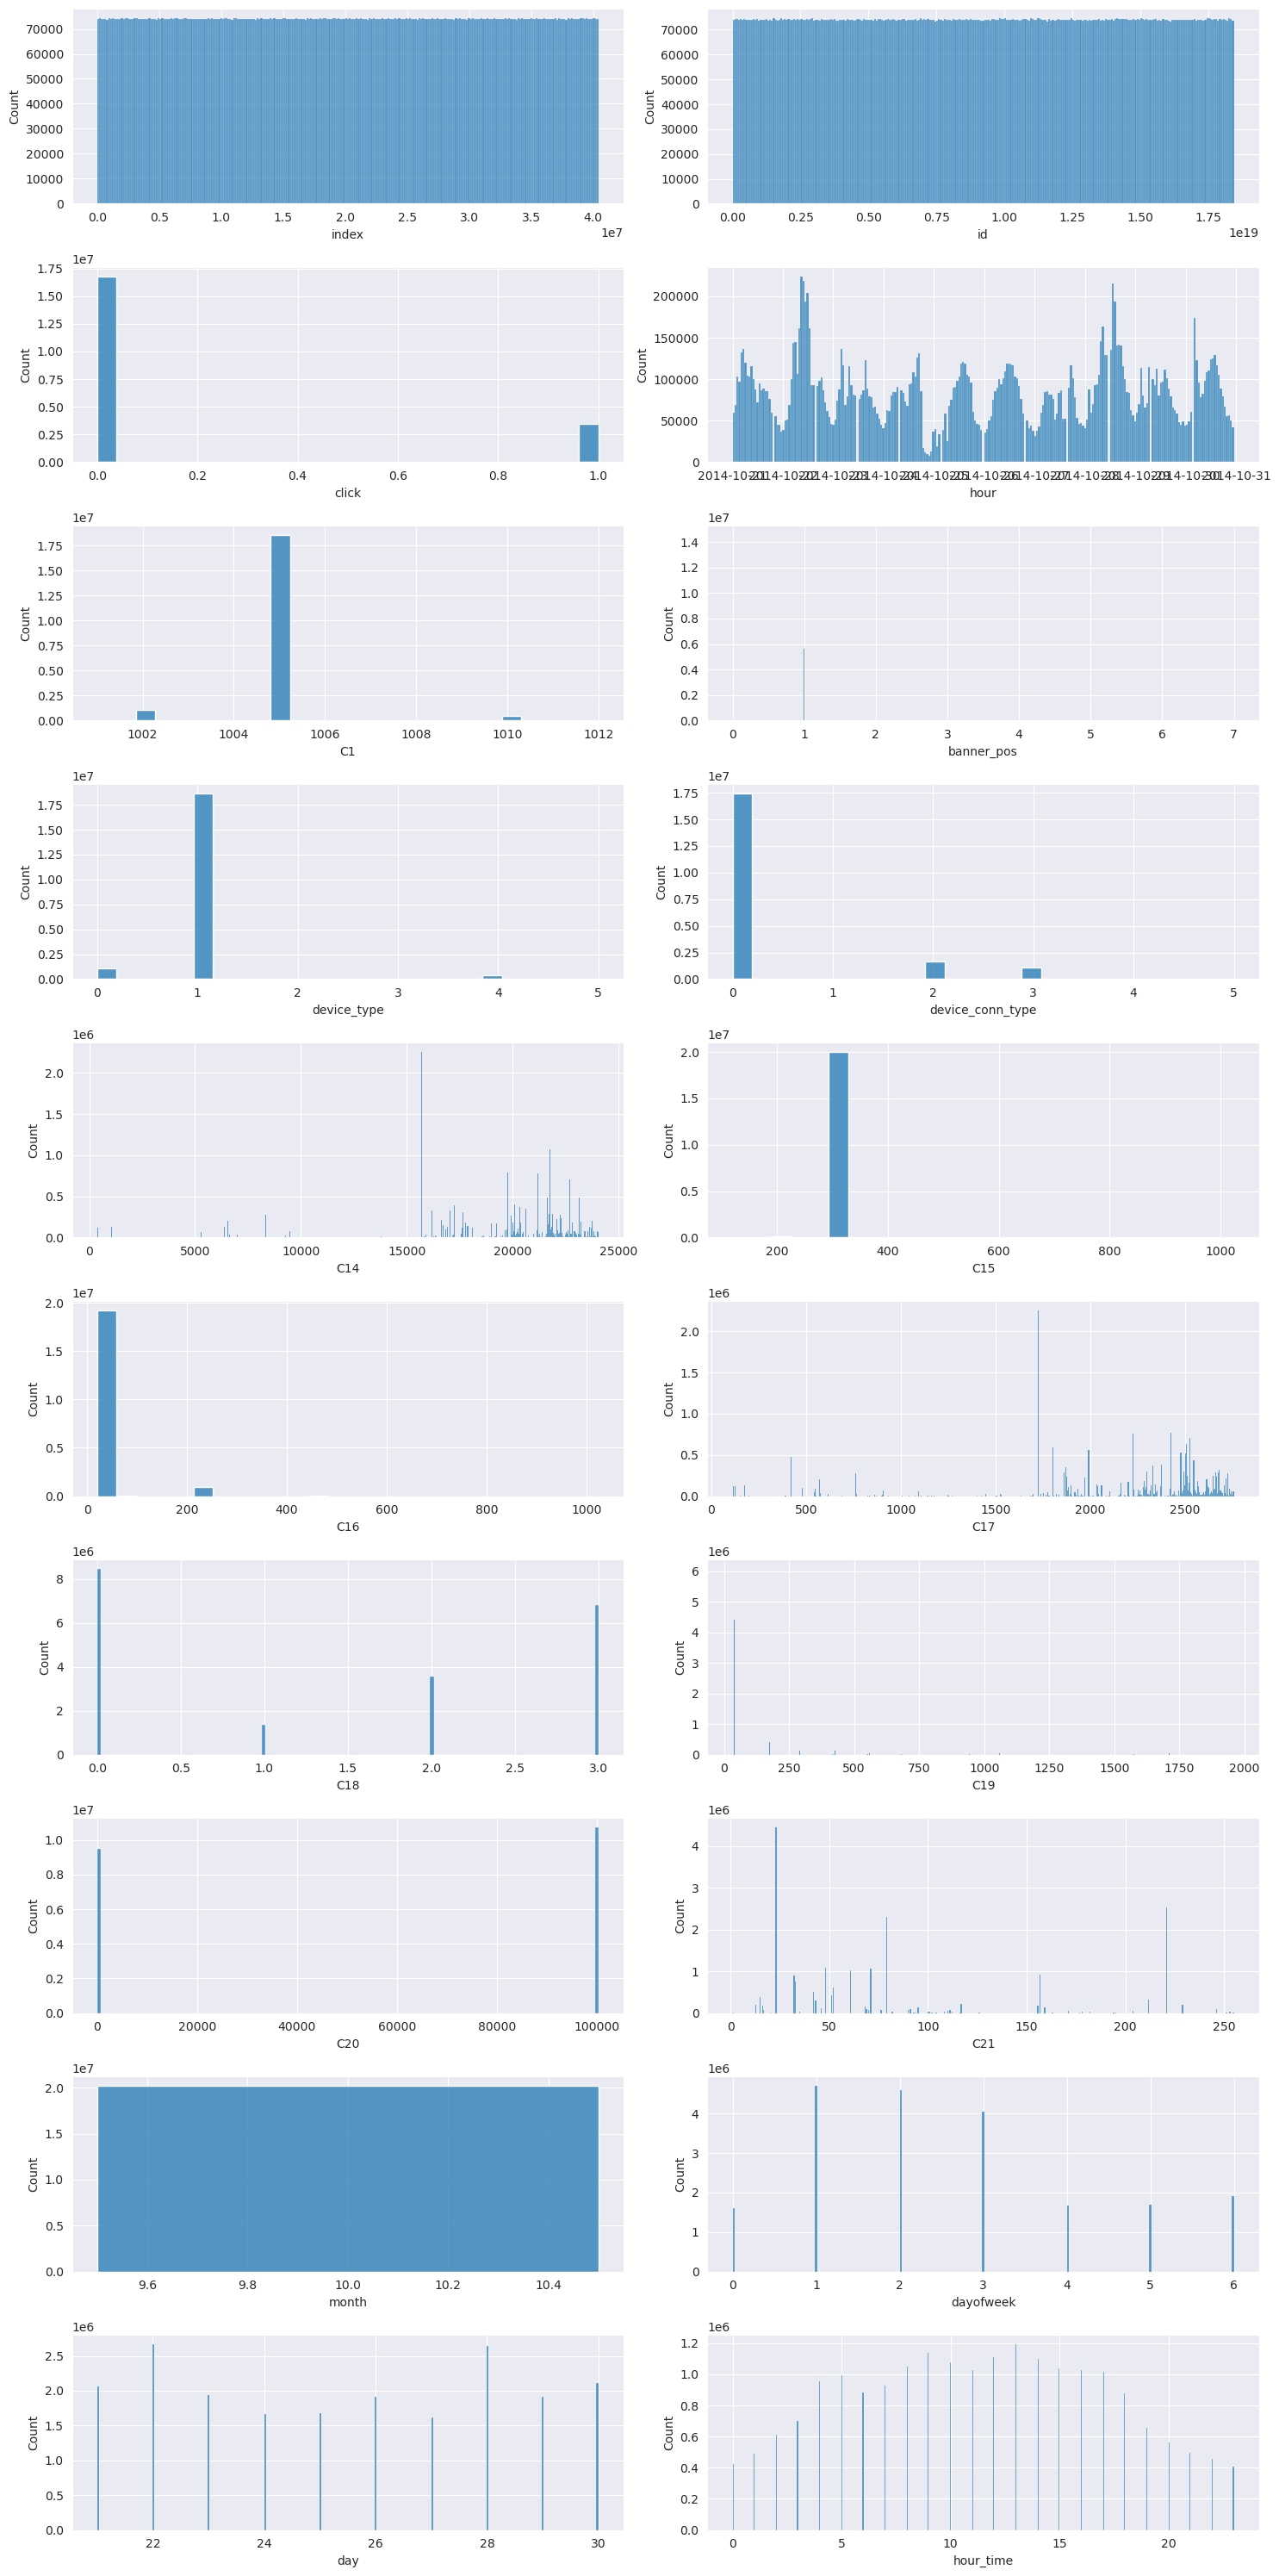

In [21]:
import math
n = 2
plt.figure(figsize=[15,3*math.ceil(len(numerical)/n)])

for i in range(len(numerical)):
    plt.subplot(math.ceil(len(numerical)/n),n,i+1)
    sns.histplot(train[numerical[i]])

plt.tight_layout()
plt.show()

/tmp/ipykernel_27189/578096393.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train.corr()


<Axes: >

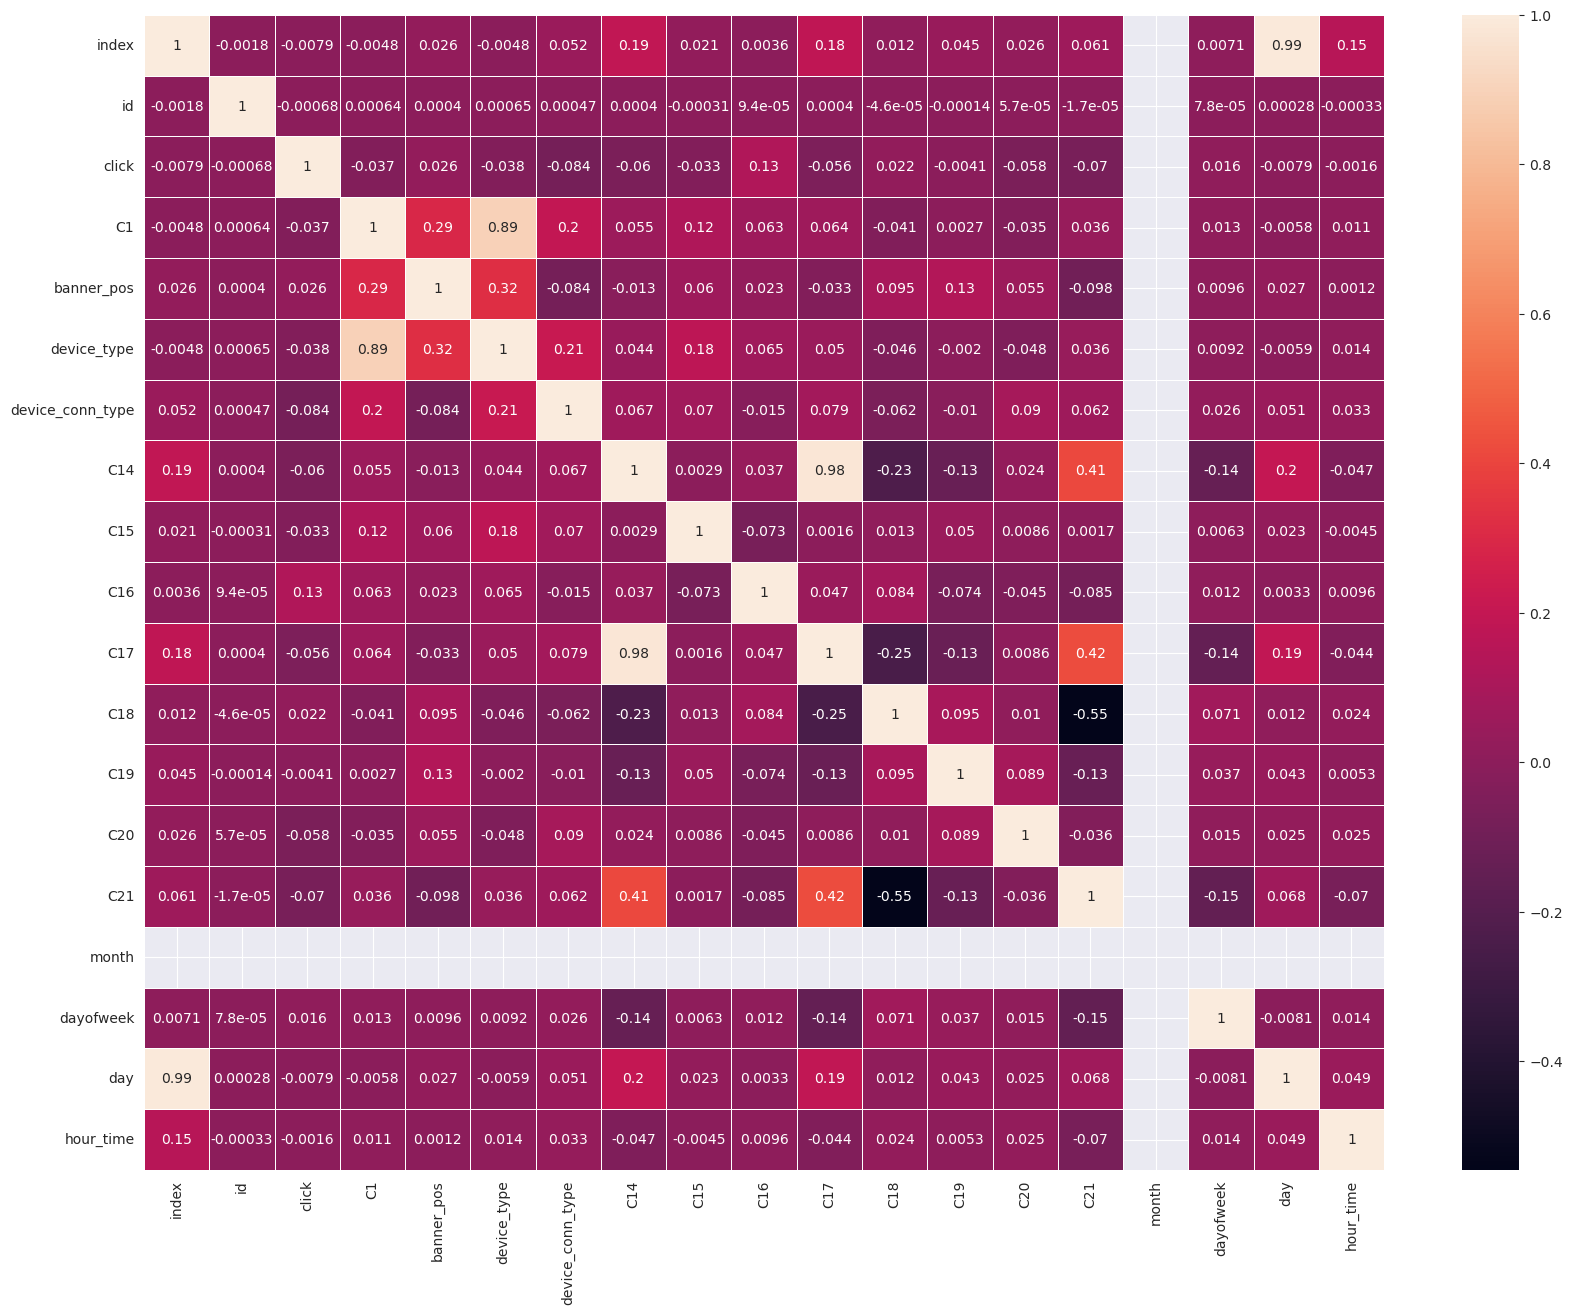

In [10]:
fig, ax = plt.subplots(figsize=(20,15))         # Sample figsize in inches
correlation = train.corr()
sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)

In [11]:
train.drop(['month', 'C20'], axis=1, inplace=True)
train.columns

Index(['index', 'id', 'click', 'hour', 'C1', 'banner_pos', 'site_id',
       'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category',
       'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C21',
       'dayofweek', 'day', 'hour_time'],
      dtype='object')

In [12]:
train.drop(['id', 'hour'], axis = 1, inplace = True)
train.rename(columns={'click': 'y',
                   'hour_time': 'hour'},
          inplace=True, errors='raise')

train.columns

Index(['index', 'y', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C21', 'dayofweek', 'day', 'hour'],
      dtype='object')

In [13]:
sampled_data = train.sample(frac=0.1, random_state=42)
X = sampled_data.drop(['y'], axis=1)
y = sampled_data['y']

In [15]:
X.shape

(2021448, 24)

In [23]:
X.to_csv('X_train.csv', index=False)
y.to_csv('y_train.csv', index=False)